In [17]:
%reload_ext lab_black
import os
import csv
import pandas as pd
import plotly.express as px

# Study data files
path_busn_2018 = "DoingBusiness_2018.csv"
path_busn_2019 = "DoingBusiness_2019.csv"
path_GDP = "Country_GDP_WB_.csv"

# Read the csvs
doing_busn_2018 = pd.read_csv(path_busn_2018)
doing_busn_2019 = pd.read_csv(path_busn_2019)
country_GDP = pd.read_csv(path_GDP)

In [18]:
# Combine the data into a single dataset
df = pd.merge(
    doing_busn_2018,
    doing_busn_2019,
    on="Economy",
    suffixes=("_2018", "_2019"),
    how="outer",
)

In [19]:
ease_df = (
    df["Ease of doing business score (DB17-20 methodology)_2018"]
    .to_frame()
    .rename(
        columns={
            "Ease of doing business score (DB17-20 methodology)_2018": "Ease of doing business score_2018"
        }
    )
)

In [20]:
ease_df["Ease of doing business score_2019"] = df[
    "Ease of doing business score (DB17-20 methodology)_2019"
]

In [21]:
ease_df["Country"] = df["Economy"]

In [22]:
ease_busn_df = ease_df.set_index("Country").dropna()

In [23]:
gdp_df = country_GDP.drop(
    columns=[
        "Country Code",
        "Indicator Name",
        "Indicator Code",
        "1960",
        "1961",
        "1962",
        "1963",
        "1964",
        "1965",
        "1966",
        "1967",
        "1968",
        "1969",
        "1970",
        "1971",
        "1972",
        "1973",
        "1974",
        "1975",
        "1976",
        "1977",
        "1978",
        "1979",
        "1980",
        "1981",
        "1982",
        "1983",
        "1984",
        "1985",
        "1986",
        "1987",
        "1988",
        "1989",
        "1990",
        "1991",
        "1992",
        "1993",
        "1994",
        "1995",
        "1996",
        "1997",
        "1998",
        "1999",
        "2000",
        "2001",
        "2002",
        "2003",
        "2004",
        "2005",
        "2006",
        "2007",
        "2008",
        "2009",
        "2010",
        "2011",
        "2012",
        "2013",
        "2014",
        "2015",
        "2016",
        "2017",
    ]
).dropna()
gdp_df

,Country Name,2018,2019
1,Afghanistan,1.948438e+10,1.910135e+10
2,Angola,1.010000e+11,9.463542e+10
3,Albania,1.514702e+10,1.527808e+10
4,Andorra,3.218316e+09,3.154058e+09
5,Arab World,2.770000e+12,2.820000e+12
...,...,...,...
258,Samoa,8.204918e+08,8.506550e+08
259,Kosovo,7.942962e+09,7.926108e+09
261,South Africa,3.680000e+11,3.510000e+11
262,Zambia,2.700524e+10,2.306472e+10


In [24]:
new_df = pd.merge(
    gdp_df, ease_busn_df, left_on="Country Name", right_on="Country", how="outer",
)

new_df

,Country Name,2018,2019,Ease of doing business score_2018,Ease of doing business score_2019
0,Afghanistan,1.948438e+10,1.910135e+10,37.1,44.2
1,Angola,1.010000e+11,9.463542e+10,39.0,41.2
2,Albania,1.514702e+10,1.527808e+10,66.8,67.0
3,Andorra,3.218316e+09,3.154058e+09,NaN,NaN
4,Arab World,2.770000e+12,2.820000e+12,NaN,NaN
...,...,...,...,...,...
257,NaN,NaN,NaN,81.5,81.4
258,NaN,NaN,NaN,85.0,85.0
259,NaN,NaN,NaN,30.0,32.1
260,NaN,NaN,NaN,59.3,59.7


In [25]:
# saving the DataFrame as a CSV file
# doing_busn_data = ease_df.to_csv("doing_business.csv", index=True)

In [26]:
busn_gdp_df = new_df.rename(columns={"2018": "GDP_2018", "2019": "GDP_2019"}).dropna()
busn_gdp_df

,Country Name,GDP_2018,GDP_2019,Ease of doing business score_2018,Ease of doing business score_2019
0,Afghanistan,1.948438e+10,1.910135e+10,37.1,44.2
1,Angola,1.010000e+11,9.463542e+10,39.0,41.2
2,Albania,1.514702e+10,1.527808e+10,66.8,67.0
5,United Arab Emirates,4.220000e+11,4.210000e+11,79.3,81.6
6,Argentina,5.200000e+11,4.500000e+11,57.3,58.2
...,...,...,...,...,...
218,Samoa,8.204918e+08,8.506550e+08,62.1,62.1
219,Kosovo,7.942962e+09,7.926108e+09,70.5,71.0
220,South Africa,3.680000e+11,3.510000e+11,65.3,66.7
221,Zambia,2.700524e+10,2.306472e+10,64.2,65.7


In [27]:
# pd.merge(info_idx_df, items_df, left_index=True, right_on="Data Source")

In [28]:
busn_gdp_df.head(15)

,Country Name,GDP_2018,GDP_2019,Ease of doing business score_2018,Ease of doing business score_2019
0,Afghanistan,1.948438e+10,1.910135e+10,37.1,44.2
1,Angola,1.010000e+11,9.463542e+10,39.0,41.2
2,Albania,1.514702e+10,1.527808e+10,66.8,67.0
5,United Arab Emirates,4.220000e+11,4.210000e+11,79.3,81.6
6,Argentina,5.200000e+11,4.500000e+11,57.3,58.2
7,Armenia,1.245794e+10,1.367280e+10,71.5,73.2
8,Antigua and Barbuda,1.610574e+09,1.727759e+09,59.8,59.9
9,Australia,1.430000e+12,1.390000e+12,80.8,80.7
10,Austria,4.560000e+11,4.460000e+11,78.7,78.7
11,Azerbaijan,4.711294e+10,4.804765e+10,66.8,73.6


In [29]:
%reload_ext lab_black
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

path_busn_2018 = "DoingBusiness_2018.csv"
path_busn_2019 = "DoingBusiness_2019.csv"
path_GDP = "Country_GDP_WB_1.csv"
path_fdi = "FDI-USA_beaGOV_.csv"

# Read the mouse data and the study results
doing_busn_2018 = pd.read_csv(path_busn_2018)
doing_busn_2019 = pd.read_csv(path_busn_2019)
country_GDP = pd.read_csv(path_GDP)
fdi = pd.read_csv(path_fdi)

In [30]:
fdi.columns

Index(['Foreign Direct Investment in the United States: Selected Items by Detailed Country, 2008–2019',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')

In [31]:
df = fdi.drop(
    [
        "Unnamed: 1",
        "Unnamed: 2",
        "Unnamed: 3",
        "Unnamed: 4",
        "Unnamed: 5",
        "Unnamed: 6",
        "Unnamed: 7",
        "Unnamed: 8",
        "Unnamed: 9",
        "Unnamed: 13",
        "Unnamed: 14",
        "Unnamed: 15",
        "Unnamed: 16",
        "Unnamed: 17",
    ],
    axis=1,
)

In [32]:
fdi_df = df.drop([0, 1, 2, 7])

In [33]:
fdi__171819_df = fdi_df.rename(
    columns={
        "Foreign Direct Investment in the United States: Selected Items by Detailed Country, 2008–2019": "Country",
        "Unnamed: 10": "FDI_2017",
        "Unnamed: 11": "FDI_2018",
        "Unnamed: 12": "FDI_2019",
    }
).dropna()

fdi__171819_df

,Country,FDI_2017,FDI_2018,FDI_2019
5,Canada,"395,495","442,802","495,720"
8,Austria,"13,160","12,392","13,964"
9,Belgium,"76,009","64,661","65,918"
10,Denmark,"18,617","20,654","23,870"
11,Finland,"6,928","14,464","14,826"
...,...,...,...,...
239,Tuvalu,0,0,0
240,"United Kingdom Islands, Indian Ocean",0,-1,0
241,"United Kingdom Islands, Pacific",(D),(D),(D)
242,Vanuatu,(D),5,(D)


In [34]:
fdi__171819_df = fdi__171819_df[~fdi__171819_df["FDI_2017"].isin(["(D)", "(*)"])]

In [35]:
fdi__171819_df = fdi__171819_df[~fdi__171819_df["FDI_2018"].isin(["(D)", "(*)"])]

In [36]:
fdi__171819_df = fdi__171819_df[~fdi__171819_df["FDI_2019"].isin(["(D)", "(*)"])]
fdi__171819_df = fdi__171819_df[
    ~fdi__171819_df["Country"].isin(
        [
            "Latin America and Other Western Hemisphere",
            "South and Central America",
            "Other",
            "Other Western Hemisphere",
        ]
    )
]

fdi__171819_df

,Country,FDI_2017,FDI_2018,FDI_2019
5,Canada,"395,495","442,802","495,720"
8,Austria,"13,160","12,392","13,964"
9,Belgium,"76,009","64,661","65,918"
10,Denmark,"18,617","20,654","23,870"
11,Finland,"6,928","14,464","14,826"
...,...,...,...,...
237,Timor-Leste,0,0,0
238,Tongo,0,0,0
239,Tuvalu,0,0,0
240,"United Kingdom Islands, Indian Ocean",0,-1,0


In [37]:
fdi__171819_df["Country"].values

array(['Canada', 'Austria', 'Belgium', 'Denmark', 'Finland', 'France',
       'Germany', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands',
       'Norway', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
       'Andorra', 'Armenia', 'Azerbaijan', 'Belarus', 'Georgia',
       'Gibraltar', 'Hungary', 'Kosovo', 'Kyrgyzstan', 'Malta', 'Moldova',
       'Monaco', 'North Macedonia', 'Portugal', 'Russia', 'San Marino',
       'Serbia', 'Slovakia', 'Slovenia', 'Tajikistan', 'Turkey',
       'Turkmenistan', 'Vatican City', 'Brazil', 'Mexico', 'Panama',
       'Venezuela', 'Argentina', 'Belize', 'Chile', 'Colombia',
       'Costa Rica', 'Ecuador', 'El Salvador', 'French Guiana',
       'Honduras', 'Nicaragua', 'Peru', 'Uruguay', 'Bahamas', 'Bermuda',
       'Curacao 2', 'Netherlands Antilles 3',
       'United Kingdom Islands, Caribbean  4', 'Antigua and Barbuda',
       'Barbados', 'Dominican Republic', 'French Islands, Caribbean',
       'Haiti', 'Jamaica', 'Sint Maarten 2', 'St. Pierre and

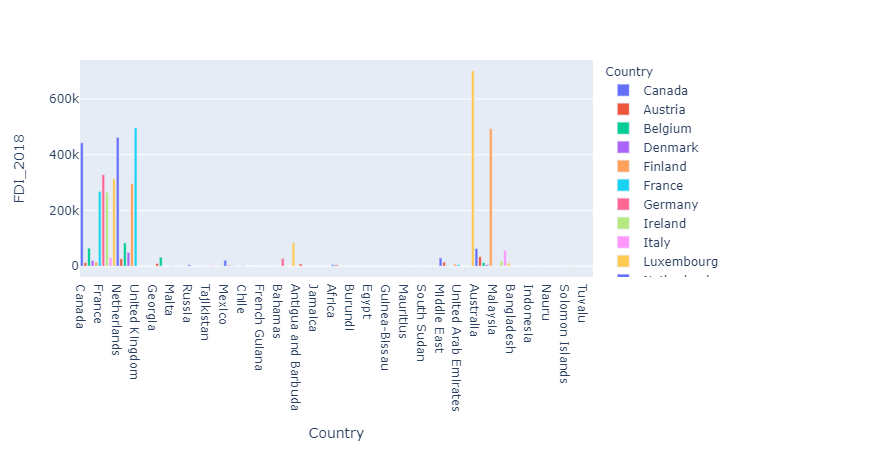

In [54]:
fig = px.bar(fdi__171819_df, x="Country", y="FDI_2018", color="Country")
fig.show()

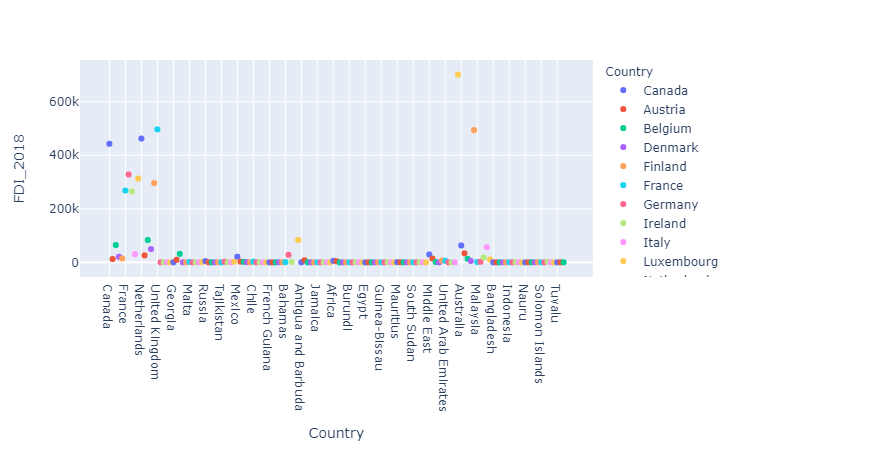

In [50]:
df = px.data.iris()
# Use directly Columns as argument. You can use tab completion for this!
fig = px.scatter(fdi__171819_df, x="Country", y="FDI_2018", color="Country")
fig.show()